#**CNN Architecture**

##Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


##Installing and Importing Libraries

In [ ]:
!pip install librosa

In [ ]:
import librosa
import os
import numpy as np

##Uploading Preprocessed Data From Google Drive

In [ ]:
#Total Number Of Audio Files
p="/content/gdrive/MyDrive/AudioDatabase"
os.chdir(p)
class_count = len(os.listdir(p))
print(class_count)

2454


In [ ]:
import joblib
X = joblib.load('/content/gdrive/MyDrive/AudioDatabases/X.joblib')
Y = joblib.load('/content/gdrive/MyDrive/AudioDatabases/Y.joblib')

##Splitting the data into trainig and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=42)

In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

##Creating CNN Architecture

In [ ]:
model = Sequential()
model.add(Conv1D(64, 5, activation='relu', input_shape=(40,1)))
model.add(Conv1D(128, 5,activation='relu'))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='softmax'))
opt = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 36, 64)            384       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 32, 128)           41088     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 4, 128)            0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 128)            0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


##Compiling And training the Model

####Using SGD optimizer

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])
import numpy as np
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [ ]:
x_traincnn=np.array(x_traincnn)
y_train=np.array(y_train)
x_testcnn=np.array(x_testcnn)
y_test=np.array(y_test)
cnnhistory=model.fit(x_traincnn, y_train, batch_size=32, epochs=200, validation_data=(x_testcnn, y_test))

Epoch 1/200
62/62 [==============================] - 2s 17ms/step - loss: 2.2957 - accuracy: 0.2022 - val_loss: 1.8920 - val_accuracy: 0.2363
Epoch 2/200
62/62 [==============================] - 1s 14ms/step - loss: 1.8901 - accuracy: 0.2547 - val_loss: 1.7870 - val_accuracy: 0.2872
Epoch 3/200
62/62 [==============================] - 1s 13ms/step - loss: 1.7938 - accuracy: 0.3077 - val_loss: 1.7319 - val_accuracy: 0.3483
Epoch 4/200
62/62 [==============================] - 1s 13ms/step - loss: 1.7133 - accuracy: 0.3546 - val_loss: 1.6643 - val_accuracy: 0.3747
Epoch 5/200
62/62 [==============================] - 1s 14ms/step - loss: 1.6714 - accuracy: 0.3561 - val_loss: 1.5731 - val_accuracy: 0.4786
Epoch 6/200
62/62 [==============================] - 1s 13ms/step - loss: 1.6050 - accuracy: 0.3877 - val_loss: 1.5639 - val_accuracy: 0.3809
Epoch 7/200
62/62 [==============================] - 1s 13ms/step - loss: 1.5705 - accuracy: 0.3968 - val_loss: 1.5239 - val_accuracy: 0.4073
Epoch 

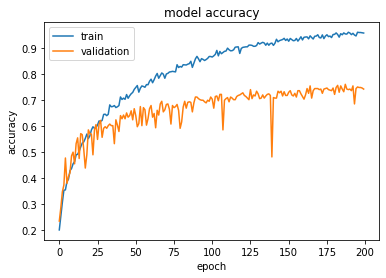

In [ ]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

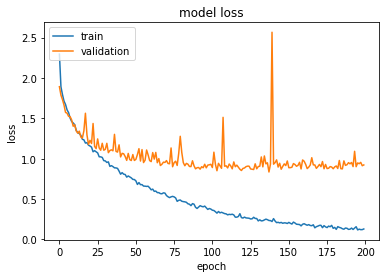

In [ ]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model = Sequential()
model.add(Conv1D(64, 5, activation='relu', input_shape=(40,1)))
model.add(Conv1D(128, 5,activation='relu'))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='softmax'))
opt = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 36, 64)            384       
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 32, 128)           41088     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 4, 128)            0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 4, 128)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)              

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


####Using Adam Optimizer

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
import numpy as np
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [ ]:
x_traincnn=np.array(x_traincnn)
y_train=np.array(y_train)
x_testcnn=np.array(x_testcnn)
y_test=np.array(y_test)
cnnhistory=model.fit(x_traincnn, y_train, batch_size=32, epochs=200, validation_data=(x_testcnn, y_test))

Epoch 1/200
62/62 [==============================] - 1s 15ms/step - loss: 0.1711 - accuracy: 0.9435 - val_loss: 0.8284 - val_accuracy: 0.7271
Epoch 2/200
62/62 [==============================] - 1s 14ms/step - loss: 0.1826 - accuracy: 0.9409 - val_loss: 0.8220 - val_accuracy: 0.7189
Epoch 3/200
62/62 [==============================] - 1s 14ms/step - loss: 0.1586 - accuracy: 0.9536 - val_loss: 0.8356 - val_accuracy: 0.7271
Epoch 4/200
62/62 [==============================] - 1s 14ms/step - loss: 0.1531 - accuracy: 0.9531 - val_loss: 0.8510 - val_accuracy: 0.7312
Epoch 5/200
62/62 [==============================] - 1s 14ms/step - loss: 0.1596 - accuracy: 0.9485 - val_loss: 0.8274 - val_accuracy: 0.7352
Epoch 6/200
62/62 [==============================] - 1s 14ms/step - loss: 0.1618 - accuracy: 0.9547 - val_loss: 0.8263 - val_accuracy: 0.7434
Epoch 7/200
62/62 [==============================] - 1s 14ms/step - loss: 0.1582 - accuracy: 0.9552 - val_loss: 0.8280 - val_accuracy: 0.7373
Epoch 

##Plotting Accuracy and Loss Graphs

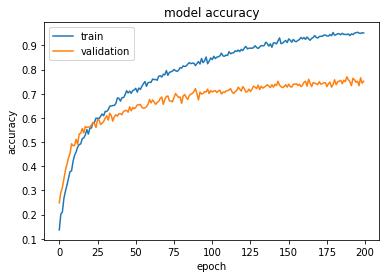

In [ ]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

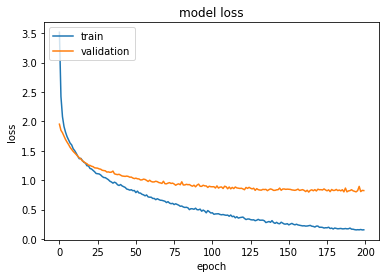

In [ ]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()